In [1]:
import pickle
import numpy as np
from dataclasses import dataclass,field
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
@dataclass
class Feature_Vector:
    Number_of_tiles: int =10
    Number_of_Tiling:int =10
    State_Dimensions: int=2
    State_Ranges:list= field(default_factory=lambda:[[2,2],[1,1]])
    Number_of_actions:int=3
    
    def __post_init__(self):
        
        self._Empty_Feature_vect=np.zeros((self.State_Dimensions,self.Number_of_Tiling,self.Number_of_tiles,self.Number_of_actions))
        self.Shift_Vect=[(i[1]-i[0])/self.Number_of_tiles/self.Number_of_Tiling for i in self.State_Ranges]
        self._Base_Shift_Vect=np.array([2*i+1 for i in range(self.Number_of_Tiling)]) 
        Temp=np.ndarray((self.State_Dimensions,self.Number_of_Tiling,self.Number_of_tiles-1),dtype=float)
        for i in range(self.State_Dimensions):
            for j in range(self.Number_of_Tiling):
                Temp[i,j,:]=np.linspace(self.State_Ranges[i][0]+self._Base_Shift_Vect[j]*(i+1)*self.Shift_Vect[i],self.State_Ranges[i][1]+self._Base_Shift_Vect[j]*(i+1)*self.Shift_Vect[i],num=self.Number_of_tiles-1)
        self.bin=Temp.copy()
    
    def Get_Feature_Vector(self,State_Action):
        Index=np.zeros((self.State_Dimensions*self.Number_of_Tiling,4),dtype=int)
        Index[...,-1]=State_Action[1]
        Index[...,1]=np.tile(np.arange(self.Number_of_Tiling),self.State_Dimensions)
        Index[...,0]=np.repeat(range(self.State_Dimensions),self.Number_of_Tiling)
        Index[...,2]=np.hstack(np.sum(np.subtract(self.bin,np.array(State_Action[0])[:,np.newaxis,np.newaxis])<0,axis=2))        
        return tuple(Index.T)


ModuleNotFoundError: No module named 'plotly'

In [2]:
with open("Sim_Res_2_A 4",'rb') as f:
    Results=pickle.load(f)

ModuleNotFoundError: No module named 'cobra'

In [4]:
Extract=np.zeros((10,10,10,10,10))


In [13]:
TD1={"Agent1":[],
   "Agent2":[],
    "Glucose":[],
    "Starch":[],
    "Action":[],
    "Value":[]    
   }
TD2={"Agent1":[],
   "Agent2":[],
    "Glucose":[],
    "Starch":[],
    "Action":[],
    "Value":[]    
   }

for i in range(Extract.shape[0]):
    print(i)
    for j in range(Extract.shape[1]):
        for k in range(Extract.shape[2]):
            for l in range(Extract.shape[3]):
                for m in range(Extract.shape[4]):
                    TD1["Agent1"].append(np.linspace(0,100,10)[i])
                    TD1["Agent2"].append(np.linspace(0,100,10)[j])
                    TD1["Glucose"].append(np.linspace(0,200,10)[k])
                    TD1["Starch"].append(np.linspace(0,10,10)[l])
                    TD1["Action"].append(m)
                    TD1["Value"].append(np.sum(Results[0][0][0].W[Results[0][0][0].Features.Get_Feature_Vector(((np.linspace(0,100,10)[i],np.linspace(0,100,10)[j],np.linspace(0,200,10)[k],np.linspace(0,10,10)[l]),m))]))
                    TD2["Agent1"].append(np.linspace(0,100,10)[i])
                    TD2["Agent2"].append(np.linspace(0,100,10)[j])
                    TD2["Glucose"].append(np.linspace(0,200,10)[k])
                    TD2["Starch"].append(np.linspace(0,10,10)[l])
                    TD2["Action"].append(m)
                    TD2["Value"].append(np.sum(Results[0][0][1].W[Results[0][0][1].Features.Get_Feature_Vector(((np.linspace(0,100,10)[i],np.linspace(0,100,10)[j],np.linspace(0,200,10)[k],np.linspace(0,10,10)[l]),m))]))


0
1
2
3
4
5
6
7
8
9


In [14]:
Table1=pd.DataFrame(TD1)
Table2=pd.DataFrame(TD2)

<AxesSubplot:>

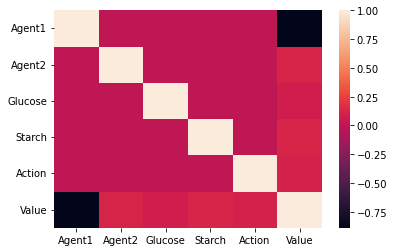

In [15]:
sns.heatmap(Table1.corr())

<AxesSubplot:>

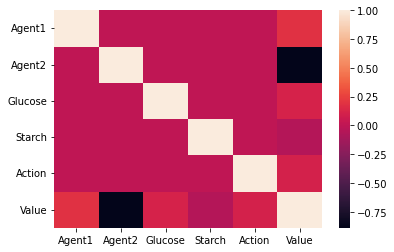

In [16]:
sns.heatmap(Table2.corr())

In [17]:
Data_Table1={"LowG_LowS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[0]))&((Table1["Glucose"]==np.linspace(0,200,10)[0]))].reset_index(drop=True).copy(),
            "LowG_MediumS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[5]))&((Table1["Glucose"]==np.linspace(0,200,10)[0]))].reset_index(drop=True).copy(),
            "LowG_HighS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[9]))&((Table1["Glucose"]==np.linspace(0,200,10)[0]))].reset_index(drop=True).copy(),
            "MediumG_LowS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[0]))&((Table1["Glucose"]==np.linspace(0,200,10)[5]))].reset_index(drop=True).copy(),
            "MediumG_MediumS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[5]))&((Table1["Glucose"]==np.linspace(0,200,10)[5]))].reset_index(drop=True).copy(),
            "MediumG_HighS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[9]))&((Table1["Glucose"]==np.linspace(0,200,10)[5]))].reset_index(drop=True).copy(),
            "HighG_LowS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[0]))&((Table1["Glucose"]==np.linspace(0,200,10)[9]))].reset_index(drop=True).copy(),
            "HighG_MediumS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[5]))&((Table1["Glucose"]==np.linspace(0,200,10)[9]))].reset_index(drop=True).copy(),
            "HighG_HighS":Table1[((Table1["Starch"]==np.linspace(0,10,10)[9]))&((Table1["Glucose"]==np.linspace(0,200,10)[9]))].reset_index(drop=True).copy(),
           }
Data_Table2={"LowG_LowS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[0]))&((Table2["Glucose"]==np.linspace(0,200,10)[0]))].reset_index(drop=True).copy(),
            "LowG_MediumS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[5]))&((Table2["Glucose"]==np.linspace(0,200,10)[0]))].reset_index(drop=True).copy(),
            "LowG_HighS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[9]))&((Table2["Glucose"]==np.linspace(0,200,10)[0]))].reset_index(drop=True).copy(),
            "MediumG_LowS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[0]))&((Table2["Glucose"]==np.linspace(0,200,10)[5]))].reset_index(drop=True).copy(),
            "MediumG_MediumS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[5]))&((Table2["Glucose"]==np.linspace(0,200,10)[5]))].reset_index(drop=True).copy(),
            "MediumG_HighS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[9]))&((Table2["Glucose"]==np.linspace(0,200,10)[5]))].reset_index(drop=True).copy(),
            "HighG_LowS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[0]))&((Table2["Glucose"]==np.linspace(0,200,10)[9]))].reset_index(drop=True).copy(),
            "HighG_MediumS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[5]))&((Table2["Glucose"]==np.linspace(0,200,10)[9]))].reset_index(drop=True).copy(),
            "HighG_HighS":Table2[((Table2["Starch"]==np.linspace(0,10,10)[9]))&((Table2["Glucose"]==np.linspace(0,200,10)[9]))].reset_index(drop=True).copy(),
           }

In [18]:
Data_Table_Optimal1={"LowG_LowS":Data_Table1["LowG_LowS"].loc[Data_Table1["LowG_LowS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "LowG_MediumS":Data_Table1["LowG_MediumS"].loc[Data_Table1["LowG_MediumS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "LowG_HighS":Data_Table1["LowG_HighS"].loc[Data_Table1["LowG_HighS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "MediumG_LowS":Data_Table1["MediumG_LowS"].loc[Data_Table1["MediumG_LowS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "MediumG_MediumS":Data_Table1["MediumG_MediumS"].loc[Data_Table1["MediumG_MediumS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "MediumG_HighS":Data_Table1["MediumG_HighS"].loc[Data_Table1["MediumG_HighS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "HighG_LowS":Data_Table1["HighG_LowS"].loc[Data_Table1["HighG_LowS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "HighG_MediumS":Data_Table1["HighG_MediumS"].loc[Data_Table1["HighG_MediumS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "HighG_HighS":Data_Table1["HighG_HighS"].loc[Data_Table1["HighG_HighS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],}


Data_Table_Optimal2={"LowG_LowS":Data_Table2["LowG_LowS"].loc[Data_Table2["LowG_LowS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "LowG_MediumS":Data_Table2["LowG_MediumS"].loc[Data_Table2["LowG_MediumS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "LowG_HighS":Data_Table2["LowG_HighS"].loc[Data_Table2["LowG_HighS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "MediumG_LowS":Data_Table2["MediumG_LowS"].loc[Data_Table2["MediumG_LowS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "MediumG_MediumS":Data_Table2["MediumG_MediumS"].loc[Data_Table2["MediumG_MediumS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "MediumG_HighS":Data_Table2["MediumG_HighS"].loc[Data_Table2["MediumG_HighS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "HighG_LowS":Data_Table2["HighG_LowS"].loc[Data_Table2["HighG_LowS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "HighG_MediumS":Data_Table2["HighG_MediumS"].loc[Data_Table2["HighG_MediumS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],
                    "HighG_HighS":Data_Table2["HighG_HighS"].loc[Data_Table2["HighG_HighS"].groupby(["Agent1","Agent2"])["Value"].idxmax()],}
OPT_DATA=[Data_Table_Optimal1,Data_Table_Optimal2]

In [19]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
Titles=[]
S=[]
for i in range(len(Data_Table_Optimal2.keys())):
#     Titles.append([])
    S.append([])
    for j in range(2):
        Titles.append("Agent"+str(j)+"_"+list(Data_Table_Optimal1.keys())[i])
        S[i].append({'is_3d': True})
fig = make_subplots(rows=9, cols=2,
                    specs=S,
                    subplot_titles=Titles)

for i in range(len(Data_Table_Optimal2.keys())):
    for j in range(2):
        Temp_Fig= go.Surface(z=OPT_DATA[j][list(OPT_DATA[j].keys())[i]]['Action'].to_numpy().reshape(10,10,order="F"), x=np.linspace(0,100,10), y=np.linspace(0,100,10),coloraxis = "coloraxis",)
        fig.append_trace(Temp_Fig,row=i+1, col=j+1)


fig.update_layout(
                    width=2000,
                    height=15000,
                    margin=dict(r=20, b=10, l=10, t=10),
                    )  
fig.update_layout(coloraxis_showscale=False)
fig.update_scenes(xaxis_title_text='Agent1',  
                  yaxis_title_text='Agent2',  
                  zaxis_title_text='Action')
fig.write_html("Policy_Two_Agent.html")


In [20]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
Titles=[]
S=[]
for i in range(len(Data_Table_Optimal2.keys())):
#     Titles.append([])
    S.append([])
    for j in range(2):
        Titles.append("Agent"+str(j)+"_"+list(Data_Table_Optimal1.keys())[i])
        S[i].append({'is_3d': True})
fig = make_subplots(rows=9, cols=2,
                    specs=S,
                    subplot_titles=Titles)

for i in range(len(Data_Table_Optimal2.keys())):
    for j in range(2):
        Temp_Fig= go.Surface(z=OPT_DATA[j][list(OPT_DATA[j].keys())[i]]['Value'].to_numpy().reshape(10,10,order="F"), x=np.linspace(0,100,10), y=np.linspace(0,100,10),coloraxis = "coloraxis",)
        fig.append_trace(Temp_Fig,row=i+1, col=j+1)


fig.update_layout(
                    width=2000,
                    height=10000,
                    margin=dict(r=20, b=10, l=10, t=10),
                    )  
fig.update_layout(coloraxis_showscale=False)
fig.update_scenes(xaxis_title_text='Agent1',  
                  yaxis_title_text='Agent2',  
                  zaxis_title_text='Value')
fig.write_html("Q_Two_Agent.html")